## Victor Moraes - 2016027600

## Primeiro trabalho pratico
## Disciplina aprendizado de maquina
# Classificação de Exoplanetas:
## um benchmark de modelos de aprendizado de maquina


## 1 Objetivo
O objetivo deste trabalho prático é de praticar os conceitos aprendidos na disciplina e de adquirir experiência no uso de alguns dos principais métodos de classificação, na avaliação de modelos e na interpretação e apresentação de resultados de experimentos. Para isso você irá utilizar e comparar métodos de classificação baseados em princı́pios diferentes em um problema de classificação binária de candidatos a exoplanetas.

## 2 Tarefa
Neste trabalho você deverá realizar uma comparação entre seis métodos de classificação: Naive
Bayes, Decision Tree, k-Nearest Neighbors, Support Vector Machines, Random Forest e Gradient
Tree Boosting. Além disto você deverá realizar os experimentos listados abaixo especı́ficos para cada método. Pode ser necessário normalizar os dados e testar diferentes valores para os hiperparâmetros dos métodos para se obter bons resultados (não é necessário entregar todas as combinações testadas, apenas a de melhor resultado, exceto os casos que foram pedidos abaixo). A avaliação dos métodos deverá ser feito usando a acurácia e validação cruzada k-fold com k igual a 5.


- Naive Bayes: Apenas um experimento para servir de baseline
- Decision Tree: Variar a altura máxima da árvore (incluindo permitir altura ilimitada) e
mostrar os resultados graficamente
- SVM: Avaliar os kernels linear, sigmoid, polinomial e RBF
- k-NN: Variar o número k de vizinhos e mostrar os resultados graficamente
- Random Forest: Variar o número de árvores e mostrar os resultados graficamente.
- Gradient Tree Boosting: Variar o número de iterações e mostrar os resultados graficamente.

Você não precisa implementar os métodos listados acima. Todos os métodos listados acima estão
disponı́veis na biblioteca scikit-learn da linguagem Python. Você também pode utilizar bibliotecas auxiliares, para gerar gráficos e de operações matemáticas por exemplo, desde que elas não imple mentem o experimento em si.
Para cada um dos experimentos realizados você deverá explicar qual o objetivo do experimento
(qual o significado do hiperparâmetro que está sendo variado por exemplo) e incluir uma interpretação dos resultados com base nos conceitos teóricos estudados na disciplina. Ao final deverá ser feita uma comparação entre a performance dos métodos, incluindo curva ROC e as métricas de precisão e revocação (precision e recall).

# 3 Conjunto de Dados
Os métodos serão testados em um problema de classificação binária de candidatos a exoplanetas
encontrados pela sonda espacial Kepler da NASA 1 . Um exoplaneta é um planeta fora do sistema solar (i.e. que não orbita o sol). A sonda primeiro identifica sinais de possı́veis exoplanetas, chamados de Kepler Object of Interest (KOI). Porem nem todos os KOIs são de fato exoplanetas, alguns se tratam de falsos positivos de origens diversas. A tarefa é então classificar os KOIs entre exoplanetas confirmados e falsos positivos. Cada observação corresponde a um KOI e as features são caracterı́sticas estimadas de cada (possı́vel) exoplaneta (tamanho, temperatura, features da estrela hospedeira, etc).
O conjunto de dados estará pronto para uso e será disponibilizado no Moodle no arquivo koi data.csv. O arquivo estará no formato CSV separado por virgulas. A primeira coluna identifica o KOI, a segunda traz a sua classificação correta (FALSE POSITIVE ou CONFIRMED) e as demais colunas são features sobre o KOI extraı́das de diversas formas. Para este trabalho não será necessário entender o significado das features.

## 1- Conjunto de testes.
Inicialmente importaremos as bibliotecas necessárias e em seguida criaremos o conjunto de amostras. Algumas serão importadas ao longo dos metodos



In [1]:
import numpy as np
from  numpy import *
import pandas as pd
from numpy.random import normal, uniform
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, ScalarFormatter
from sklearn.model_selection import train_test_split
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


Aqui é realizado uma sumarização da tabela para vislumbrar caracteristicas basicas como numero de features, variação e médias. Se há valores negativos, label, classificações.

In [2]:
koi = pd.read_csv('koi_data.csv').dropna()
koi.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [3]:
koi.describe()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,...,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000
mean,37.032237,0.717106,5.607025,21340.318993,0.235205,3.415370,112.230798,0.158146,81.181413,1143.721069,...,-0.355681,-0.805629,-0.000263,0.000439,-0.049743,-0.087413,1.930251,-0.038402,-0.098738,1.920226
std,88.417985,2.628207,6.962634,66989.808550,2.586213,25.131368,3699.799318,0.241792,16.308839,775.788868,...,10.978677,14.741473,0.065707,0.077519,2.465670,2.746534,3.147553,2.465094,2.734732,3.142764
min,0.306940,0.000000,0.104600,0.800000,0.001290,0.000040,0.080000,0.007200,2.290000,92.000000,...,-275.600000,-397.620000,-4.000000,-0.800000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000
25%,2.213962,0.226000,2.500250,176.800000,0.013058,0.176092,1.460000,0.033000,81.930000,615.250000,...,-0.500000,-0.570000,-0.000240,-0.000240,-0.270000,-0.291500,0.128250,-0.265250,-0.320000,0.180000
50%,7.386755,0.610000,3.805500,495.950000,0.024185,0.748045,2.600000,0.073650,87.890000,948.000000,...,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.460000,-0.007000,-0.018000,0.453000
75%,23.448117,0.923750,6.000750,2120.525000,0.171260,2.267063,21.645000,0.158200,89.520000,1482.000000,...,0.500000,0.450000,0.000260,0.000280,0.230000,0.230000,2.570000,0.226250,0.250000,2.420000
max,1071.232620,100.806000,138.540000,864260.000000,99.870650,918.752390,200346.000000,2.034500,90.000000,9791.000000,...,97.780000,98.780000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,31.200000,89.600000


Em seguida, realizamos um processamento e tradução da labem em string para flags de classificação 0 ou 1.

In [5]:
koi_identification = koi['kepoi_name']
koi_disposition = koi['koi_disposition']
labels = koi_disposition
remap_labels = {"FALSE POSITIVE":0, "CONFIRMED":1}
y = labels.map(remap_labels).to_numpy()
print('y:',y[:5])

features = koi.iloc[:,2:]
X = features.to_numpy()
print('X:',X[:5, :5])

y: [1 1 0 1 0]
X: [[9.488040e+00 1.460000e-01 2.957500e+00 6.158000e+02 2.234000e-02]
 [5.441838e+01 5.860000e-01 4.507000e+00 8.748000e+02 2.795000e-02]
 [1.736950e+00 1.276000e+00 2.406410e+00 8.079200e+03 3.873900e-01]
 [2.525590e+00 7.010000e-01 1.654500e+00 6.033000e+02 2.406000e-02]
 [7.361790e+00 1.169000e+00 5.022000e+00 2.337000e+02 1.833900e-01]]


## 1.1 Selecção de caracteristicas
Seleção com fim de reduzir dimensionalidade e reduzir tempo de treino. Nem todas features tem um peso muito grande na classificação. Inclusive muitas delas apresentam linearidades entre si, de certa forma induzindo redundâncias, e assim podendo ser dispensadas no treino. Neste mesmo experimento de exoplanetas, na literatura, indicou que de 41 para 15 features degradou a qualidade da classificação em menos de 2%, e diminuiu o tempo de treino consideravelmente.

In [6]:
X_all_features = features.to_numpy()
num_features = 15
X = SelectKBest(f_classif, k=num_features).fit_transform(X_all_features, y)

In [7]:
X.shape

(5202, 15)

<p style="page-break-after:always;"></p>

## 2. Separação de conjuntos de treinamento e testes

Neste ponto é realizada a separação de amostras de treino (75%) e validação (25%) iniciais.
Valores comuns na literatura. Este metodo realiza a seleção randomizada de amostras para cada grupo a fim de não impor bias.


In [8]:
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

## 3. Escalonamento

Aqui é realizado o escalonamento, que melhora a qualidade do treino quando o dado envolve valores altos, que de fato existem, como pode ser descrito na sumarização da tabela.


In [9]:
enable_scaling = True

sc_train = StandardScaler().fit(X_train)
sc_test = StandardScaler().fit(X_test)
sc_all = StandardScaler().fit(X)

if(enable_scaling == True):
    X_train_std = sc_train.transform(X_train)
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)
else:
    X_train_std = X_train 
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)

# SVM
Os experimentos a seguir são baseados nos modelos de SVM, ou maquinas de vetores de suporte. Consistem em encontrar uma margem que maximiza a distância entre os pontos extremos da classificação. Essa margem de separação pode ser tanto um hiperplano linear, polinomial, radial ou sigmoid, dado por seu kernel. O kernel realiza uma transformação de um hiper espaço linear para um não linear, podendo ser capaz de melhor classificar. Neste experimento variamos os kernels e sintonizamos os hiperparametros via grid search. 
Em seguida é realizada uma validação cruzada 5 fold e apresentado a média, variancia de escore para cada modelo. Assim como uma tabela de escore ROC e precision/recall para a validação final do modelo.


Nesta implementação é permitido que os pontos não sejam necessariamente linearmente separáveis, sendo o desvio tolerável ditado pelo parâmetro C. 
Para determinar isso foi feito uma busca em rede para validar qual kernel e quais parametros possuem o melhor desempenho. A busca em rede conta com validação cruzada kfold com 5 conjuntos para cada classificador testado. 

Obtivemos que o kernel rbf ( radial basis function ), ou função radial, foi a de melhor escore ROC.

Outro parametro do kernel RBF é o gamma, representado na equação a seguir por sigma. É um parâmetro do kernel que determina a geometria e curvatura do superplano de classificação.    
Aqui é utilizado o kernel radial : $K(x_i,x_j)= exp(-\frac{||x_i-x_j||}{2\sigma^2})$



In [ ]:

kernels = {
'linear':  dict(C=1000),    
'poly' :   dict(C=1, gamma=0.1),
'rbf':     dict(C=177, gamma=0.01),
'sigmoid': dict(C=1, gamma=0.01)
}

for kernel, params in kernels.items():
    clf=SVC(kernel=kernel)
    scores = cross_val_score(clf, X_std, y, cv=5)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    best_params = clf.get_params()
    print(
        """O melhor modelo SVM de kernel {} encontrado tem os parametros:
{} 
com uma acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
""".format(kernel, params, 100*mean_score,  100*std_score))
    

    #Predict test data set.
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
    print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
    print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
    print('----')

O melhor modelo SVM de kernel linear encontrado tem os parametros:
{'C': 1000} 
com uma acuracia de 95.00 % e desvio padrão de: 1.92 %

              precision    recall  f1-score   support

           0      0.965     0.814     0.883       802
           1      0.761     0.952     0.846       499

    accuracy                          0.867      1301
   macro avg      0.863     0.883     0.864      1301
weighted avg      0.887     0.867     0.869      1301

ROC score:88.31
----
O melhor modelo SVM de kernel poly encontrado tem os parametros:
{'C': 1, 'gamma': 0.1} 
com uma acuracia de 86.85 % e desvio padrão de: 3.29 %

              precision    recall  f1-score   support

           0      0.982     0.796     0.879       802
           1      0.748     0.976     0.847       499

    accuracy                          0.865      1301
   macro avg      0.865     0.886     0.863      1301
weighted avg      0.892     0.865     0.867      1301

ROC score:88.57
----
O melhor modelo SVM de 

# KNN
No experimento a seguir é realizado o treino e validação, de modelos da familha KNN - ou K vizinhos mais proximos. Consiste em classificar uma amostra em função dos N vizinhos mais proximos. Foi feita uma varredura para encontrar o modelo de melhor média de acertos, variando o grau da distancia de minkowsky, se pesos eram uniformes ou inversamente proporcionais. e encontrou-se para K=6, distancia uniforme e distancia euclidiana (p=2), temos a melhor média de acertos, na faixa de 91%.

Fitting 5 folds for each of 32 candidates, totalling 160 fits
O melhor modelo SVM de kernel linear encontrado tem os parametros:
{'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'} 
com uma acuracia de 90.75 % e desvio padrão de: 0.43 %

Score medio:89.01%, desvio medio:1.26%

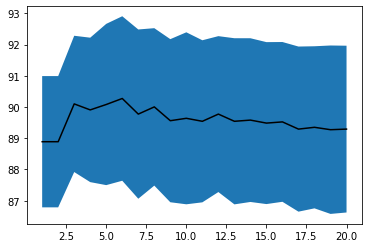

In [84]:
K_max = 20
num_neighbours = arange(1,K_max+1)
leaf = 50
leaf_size = arange(1,K_max+1)
mean_score = zeros(K_max)
best_score = mean_score
std_score = zeros(K_max)
best_std_score = std_score
p_max=3
p_dist= arange(1,p_max+1)
verbose = False
param_weights = ['uniform','distance']

for i,n_neighbors in enumerate(num_neighbours):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', p=2, n_jobs=3)
    scores = cross_val_score(clf, X_std, y, cv=5)

    mean_score[i] = 100*np.mean(scores)
    std_score[i] = 100*np.std(scores)
    best_params =  clf.get_params()
    if verbose:
        print(
        """ KNN de parametros:
{} 
com uma acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
----
""".format(best_params, mean_score[i],  std_score[i]))
best_score = mean_score if np.max(mean_score) > np.max(best_score) else best_score
best_std_score = std_score if np.max(std_score) > np.max(best_std_score) else best_std_score
            
plt.tick_params()        
plt.plot(num_neighbours, best_score, 'k-')
plt.fill_between(num_neighbours, best_score-best_std_score, best_score+best_std_score)
plt.show()    

In [85]:

#Predict test data set.
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
print('----')
y_score_KNN= (y_test.copy(), y_pred.copy())

              precision    recall  f1-score   support

           0      0.976     0.845     0.906       786
           1      0.804     0.969     0.879       515

    accuracy                          0.894      1301
   macro avg      0.890     0.907     0.892      1301
weighted avg      0.908     0.894     0.895      1301

ROC score:90.69
----


## Naive Bayes
Neste experimento é realizado o classificador nayve bayes. Consiste em realizar classificações baseadas no teorema de bayes de probabilidade condicional, baseada em probabilidades dadas conhecimento previo. Este escore servirá de baseline para benchmark entre os melhores modelos.

In [81]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
#Predict test data set.
scores = cross_val_score(clf, X_std, y, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)
best_params = clf.get_params()
print(
     """Acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
""".format(100*mean_score,  100*std_score))


#Predict test data set.
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
print('----')
y_score_NBC = (y_test.copy(), y_pred.copy())


Acuracia de 89.52 % e desvio padrão de: 2.61 %

              precision    recall  f1-score   support

           0      0.971     0.845     0.903       786
           1      0.802     0.961     0.875       515

    accuracy                          0.891      1301
   macro avg      0.887     0.903     0.889      1301
weighted avg      0.904     0.891     0.892      1301

ROC score:90.30
----


## Arvores Aleatórias
Neste experimento se utiliza o classificador de florestas aleatoreas. É um algoritmo genetico que seleciona as melhores arvores de decisão, variando a distribuição e classificação delas. Recebe como argumento o numero de estimadores e a profundade das arvores geradas. O melhor modelo tem hiperparametro de 150 estimadores, com 5 de profundidade. ROC escore de 88% e escore médio de validação cruzada de 94%

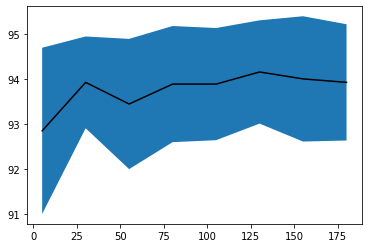

In [86]:
from sklearn.ensemble import RandomForestClassifier

max_trees = 200
num_trees = arange(5,max_trees+1, 25)
num_models=len(num_trees)
mean_score = zeros(num_models)
best_score = mean_score.copy()
std_score = zeros(num_models)
best_std_score = std_score.copy()
verbose = False

for i,trees in enumerate(num_trees):
     clf = RandomForestClassifier(n_estimators=trees, max_depth=5)
     scores = cross_val_score(clf, X_std, y, cv=5, verbose=False, n_jobs=3)

     mean_score[i] = 100*np.mean(scores)
     std_score[i] = 100*np.std(scores)
     best_params =  clf.get_params()
     if verbose:
          print(
          """ Random forest de parametros:
{} 
com uma acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
----
""".format(best_params, mean_score[i],  std_score[i]))
best_score = mean_score if np.max(mean_score) > np.max(best_score) else best_score
best_std_score = std_score if np.max(std_score) > np.max(best_std_score) else best_std_score
     
plt.tick_params()        
plt.plot(num_trees, best_score, 'k-')
plt.fill_between(num_trees, best_score-best_std_score, best_score+best_std_score)
plt.show()    




In [87]:

clf = RandomForestClassifier(n_estimators=150, max_depth=5)

#Predict test data set.
scores = cross_val_score(clf, X_std, y, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)
best_params = clf.get_params()
print(
     """Acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
""".format(100*mean_score,  100*std_score))


#Predict test data set.
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
print('----')
y_score_RFC = (y_test.copy(), y_pred.copy())

Acuracia de 94.14 % e desvio padrão de: 1.24 %

              precision    recall  f1-score   support

           0      0.917     0.924     0.920       786
           1      0.882     0.872     0.877       515

    accuracy                          0.903      1301
   macro avg      0.899     0.898     0.899      1301
weighted avg      0.903     0.903     0.903      1301

ROC score:89.78
----


Neste experimento são utilizadas arvores de decisão. Consistem em um classificador que secciona o hiperplano de parametros em uma arvore de critérios para classificar cada amostra. Tem como um dos argumentos a profundidade da arvore. O melhor modelo tem profundidade = 125, de escore por cross validadtion de 92%. O escore ROC ficou baixo. Possivel que aponte muitos falsos negativos.

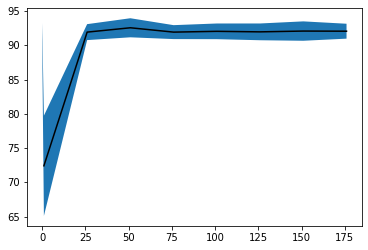

In [88]:
from sklearn.tree import DecisionTreeClassifier
max_depth = 200
num_depth = [None] + arange(1,max_depth+1, 25).tolist()
num_models=len(num_depth)
mean_score = zeros(num_models)
best_score = mean_score.copy()
std_score = zeros(num_models)
best_std_score = std_score.copy()
verbose = False

for i,depth in enumerate(num_depth):
     clf = DecisionTreeClassifier(max_depth=depth)
     scores = cross_val_score(clf, X_std, y, cv=5, verbose=False, n_jobs=3)

     mean_score[i] = 100*np.mean(scores)
     std_score[i] = 100*np.std(scores)
     best_params =  clf.get_params()
     if verbose:
          print(
          """ Random forest de parametros:
{} 
com uma acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
----
""".format(best_params, mean_score[i],  std_score[i]))
best_score = mean_score if np.max(mean_score) > np.max(best_score) else best_score
best_std_score = std_score if np.max(std_score) > np.max(best_std_score) else best_std_score
     
plt.tick_params()        
plt.plot(num_depth, best_score, 'k-')
num_depth[0] = 0
plt.fill_between(num_depth, best_score-best_std_score, best_score+best_std_score)
plt.show()    

 

In [56]:

clf = DecisionTreeClassifier(max_depth=125)

#Predict test data set.
scores = cross_val_score(clf, X_std, y, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)
best_params = clf.get_params()
print(
     """Acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
""".format(100*mean_score,  100*std_score))


#Predict test data set.
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
print('----')
y_score_DTC = (y_test.copy(), y_pred.copy())

Acuracia de 92.27 % e desvio padrão de: 1.39 %

              precision    recall  f1-score   support

           0      0.631     0.975     0.766       786
           1      0.770     0.130     0.223       515

    accuracy                          0.640      1301
   macro avg      0.701     0.552     0.494      1301
weighted avg      0.686     0.640     0.551      1301

ROC score:55.23
----


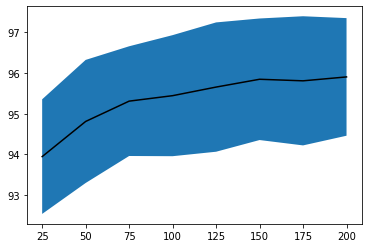

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

max_num = 200
num_estimators = arange(25,max_num+1, 25)
num_models=len(num_estimators)
mean_score = zeros(num_models)
best_score = mean_score.copy()
std_score = zeros(num_models)
best_std_score = std_score.copy()
verbose = False

for i,num in enumerate(num_estimators):
     clf = GradientBoostingClassifier(n_estimators=num)
     scores = cross_val_score(clf, X_std, y, cv=5, verbose=False, n_jobs=3)

     mean_score[i] = 100*np.mean(scores)
     std_score[i] = 100*np.std(scores)
     best_params =  clf.get_params()
     if verbose:
          print(
          """ Gradient boosting de parametros:
{} 
com uma acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
----
""".format(best_params, mean_score[i],  std_score[i]))
best_score = mean_score if np.max(mean_score) > np.max(best_score) else best_score
best_std_score = std_score if np.max(std_score) > np.max(best_std_score) else best_std_score
     
plt.tick_params()        
plt.plot(num_estimators, best_score, 'k-')
plt.fill_between(num_estimators, best_score-best_std_score, best_score+best_std_score)
plt.show() 

In [64]:

clf = GradientBoostingClassifier(n_estimators=150)

#Predict test data set.
scores = cross_val_score(clf, X_std, y, cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)
best_params = clf.get_params()
print(
     """Acuracia de {:2.2f} % e desvio padrão de: {:2.2f} %
""".format(100*mean_score,  100*std_score))


#Predict test data set.
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)#Checking performance our model with classification report.
print(classification_report(y_test, y_pred,digits=3))#Checking performance our model with ROC Score.
print("ROC score:{:2.2f}".format(100*roc_auc_score(y_test, y_pred)))
print('----')
y_score_GBC = (y_test.copy(), y_pred.copy())

Acuracia de 95.85 % e desvio padrão de: 1.50 %

              precision    recall  f1-score   support

           0      0.739     0.978     0.842       786
           1      0.935     0.474     0.629       515

    accuracy                          0.779      1301
   macro avg      0.837     0.726     0.736      1301
weighted avg      0.817     0.779     0.758      1301

ROC score:72.61
----


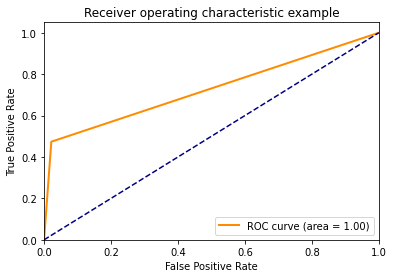

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_test)
roc_auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Conclusão


Neste trabalho foi aplicar o algoritmos vistos em sala de aula, para um problema prático de classificação. Não foi possivel de realizar o benchmark a tempo. Mas esses experiemntos foram interessantes para explorar os aspectos e cada modelo estudado em sala de aula.

## Referências:

C support vector classification - SciKitLearn
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  


Gridsearch - SciKitLearn
https://scikit-learn.org/stable/modules/grid_search.html#grid-search